In [811]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [812]:
df = pd.read_csv('Life_train.csv')

df.columns = df.columns.map(lambda x: x.strip())
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2


In [813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2489 non-null   int64  
 1   Life expectancy                  2489 non-null   float64
 2   Adult Mortality                  2489 non-null   float64
 3   infant deaths                    2489 non-null   int64  
 4   Alcohol                          2322 non-null   float64
 5   percentage expenditure           2489 non-null   float64
 6   Hepatitis B                      2009 non-null   float64
 7   Measles                          2489 non-null   int64  
 8   BMI                              2461 non-null   float64
 9   under-five deaths                2489 non-null   int64  
 10  Polio                            2471 non-null   float64
 11  Total expenditure                2293 non-null   float64
 12  Diphtheria          

In [814]:
info_nan = df.isna().sum()
info_nan[info_nan > 0]

Alcohol                            167
Hepatitis B                        480
BMI                                 28
Polio                               18
Total expenditure                  196
Diphtheria                          18
GDP                                386
Population                         554
thinness  1-19 years                28
thinness 5-9 years                  28
Income composition of resources    146
Schooling                          146
dtype: int64

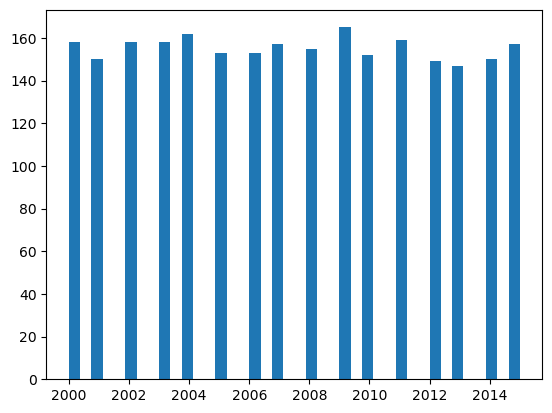

In [848]:
plt.hist(df['Year'], bins=40);

In [844]:
df['Year'].value_counts()

2009    165
2004    162
2011    159
2003    158
2000    158
2002    158
2007    157
2015    157
2008    155
2006    153
2005    153
2010    152
2014    150
2001    150
2012    149
2013    147
Name: Year, dtype: int64

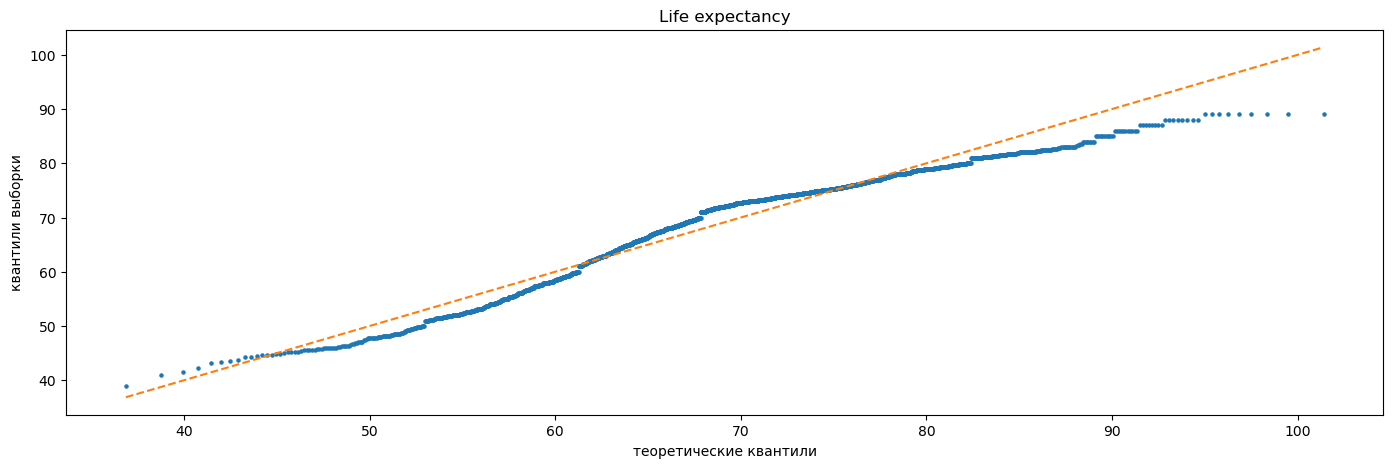

In [816]:
columns = ['Life expectancy']

fig, ax = plt.subplots(figsize=(17, 5))

for ind, col in enumerate(columns):
    
    ax.set_title(col)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

    m_df = df[col].mean()
    std_df = df[col].std()

    interval = np.linspace(0, 1, df[col].shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=m_df, scale=std_df)
    y = np.quantile(df[col], interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')

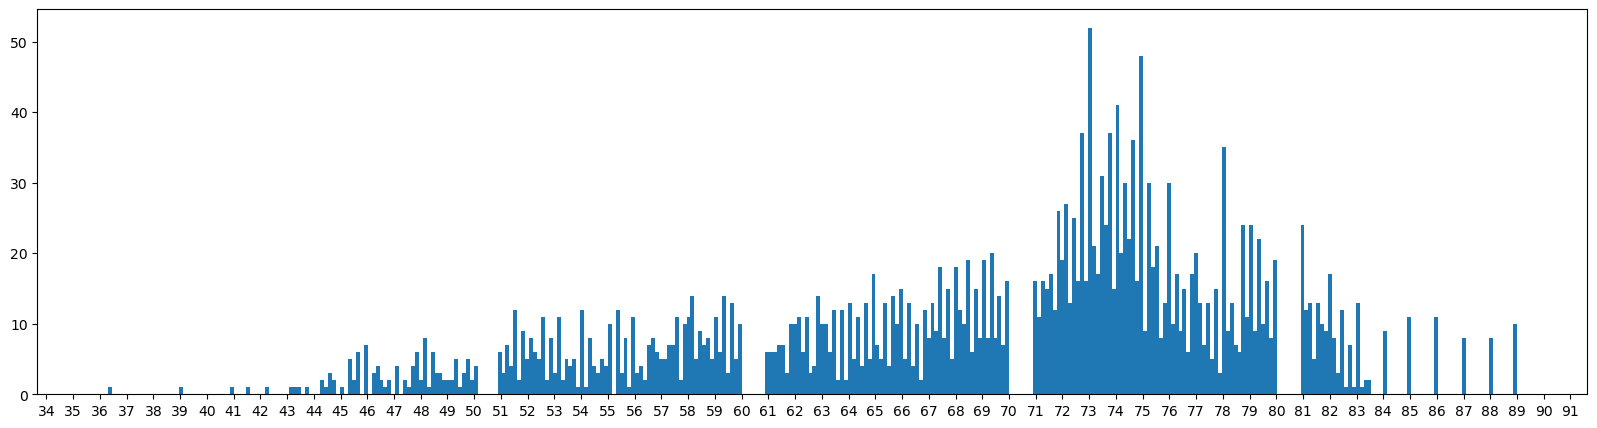

In [817]:
plt.figure(figsize=(20, 5))
plt.xticks(np.arange(0, 101))
plt.hist(df['Life expectancy'], bins=len(df['Life expectancy'].unique()));

<AxesSubplot:xlabel='Year', ylabel='Life expectancy'>

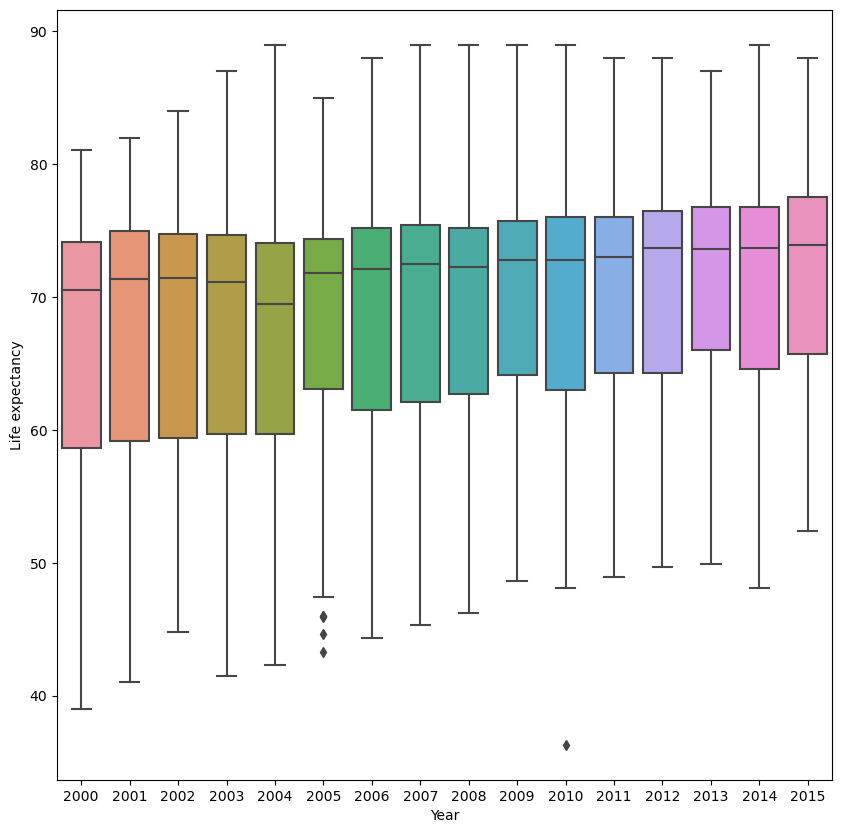

In [818]:
plt.figure(figsize=(10, 10))
sns.boxplot(df, x='Year', y='Life expectancy')

In [819]:
df_2005 = df[df['Year'] == 2005]
ro_2005 = df_2005.quantile(0.75) - df_2005.quantile(0.25)
mask_2005 = (df_2005.quantile(0.25) - ro_2005 * 1.5)['Life expectancy']

df = df.loc[(df['Year'] != 2005) | (df['Life expectancy'] > mask_2005)]

df_2010 = df[df['Year'] == 2010]
ro_2010 = df_2010.quantile(0.75) - df_2010.quantile(0.25)
mask_2010 = (df_2010.quantile(0.25) - ro_2010 * 1.5)['Life expectancy']

df = df.loc[(df['Year'] != 2010) | (df['Life expectancy'] > mask_2010)]

df

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,2006,45.4,7.0,28,4.57,34.262169,68.0,212,27.9,45,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2485,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2486,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2487,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


In [820]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def data_preprocessing(df, train=True):

    # X = pd.get_dummies(X, columns=['Year'])
    # X = X.interpolate(method='pad', axis=0)

    X = df.copy() 
    imputer = KNNImputer(n_neighbors=5, weights='uniform')
    # std = StandardScaler()
    std = MinMaxScaler()

    X_nonan = imputer.fit_transform(X)

    X_nonan = pd.DataFrame(X_nonan, columns=X.columns)

    if train:
        X_nonan = X_nonan.drop(['Life expectancy'], axis=1)
    
    X_std = std.fit_transform(X_nonan)

    return pd.DataFrame(X_std, columns=X_nonan.columns)

In [821]:
X = data_preprocessing(df)

In [822]:
X.isna().sum()

Year                               0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

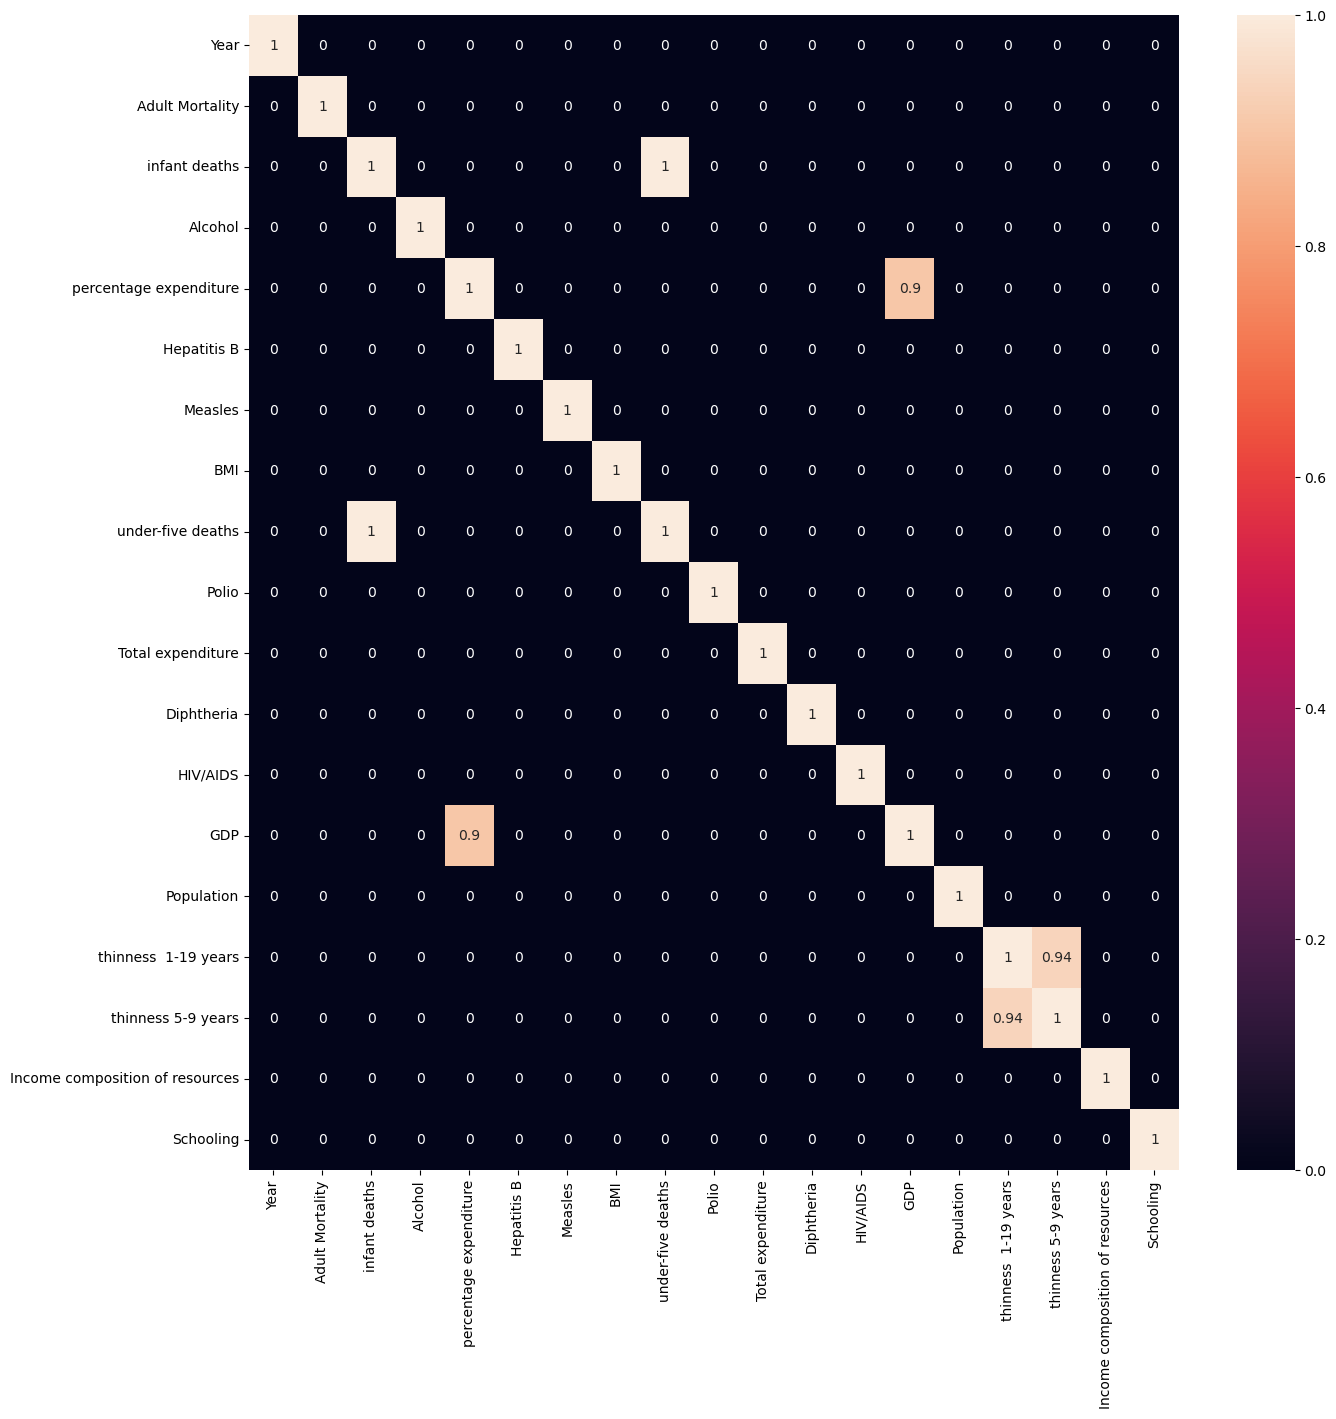

In [823]:
plt.figure(figsize=(15, 15))
corr_map = (X.corr() > 0.9) * np.abs(X.corr())
sns.heatmap(corr_map, annot=True);

In [824]:
# corr = corr_map
# drop_col = []
# for i in range(corr.shape[0]):
#     for j in range(i + 1):
#         if i !=j and corr.iloc[i, j] > 0.9 and corr.iloc[i].index[j] != 'Life expectancy':
#             drop_col.append(corr.iloc[i].index[i])

In [825]:
# X = X.drop('under-five deaths', axis=1)

In [826]:
X.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.933333,0.373961,0.035556,0.0,0.003774,0.622449,0.002319,0.229765,0.0344,0.572917,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.485437
1,0.866667,0.369806,0.036667,0.0,0.003759,0.642857,0.002027,0.223238,0.0356,0.614583,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.495781,0.480583
2,0.800000,0.375346,0.038333,0.0,0.004014,0.673469,0.013135,0.216710,0.0372,0.666667,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.488397,0.475728
3,0.733333,0.379501,0.039444,0.0,0.000364,0.683673,0.014200,0.211488,0.0388,0.677083,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.478903,0.461165
4,0.666667,0.385042,0.041111,0.0,0.004090,0.663265,0.009374,0.204961,0.0408,0.656250,0.512478,0.659794,0.0,0.004629,0.002228,0.663043,0.642105,0.472574,0.446602


In [827]:
y = df['Life expectancy']

In [828]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [829]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [830]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

2.901868943421971
14.549288055390903
0.8446391797388207


In [831]:
df_test = pd.read_csv('Life_test.csv')

df_test.columns = df_test.columns.map(lambda x: x.strip())
df_test.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2005,116.0,0,11.59,167.231990,NaN,2,57.5,0,96.0,6.89,96.0,0.1,1224.245900,4442.0,1.8,1.8,0.777,13.6
1,2011,139.0,2,9.10,10.325889,96.0,4189,57.7,2,89.0,5.53,89.0,0.1,92.277825,2147528.0,2.9,3.1,0.798,15.7
2,2003,126.0,1,5.52,58.459760,98.0,0,48.6,2,95.0,7.60,98.0,0.1,4267.135780,329174.0,2.2,2.2,0.728,12.8
3,2008,295.0,237,2.09,0.000000,65.0,12461,18.2,324,64.0,4.46,65.0,1.8,NaN,NaN,1.8,1.7,NaN,NaN
4,2010,178.0,23,0.24,84.623025,82.0,190,16.4,30,83.0,6.43,82.0,0.2,592.183522,2723137.0,16.7,17.2,0.515,11.1


In [832]:
info_nan = df_test.isna().sum()
info_nan[info_nan > 0]

Alcohol                            26
Hepatitis B                        73
BMI                                 4
Polio                               1
Total expenditure                  30
Diphtheria                          1
GDP                                57
Population                         90
thinness  1-19 years                4
thinness 5-9 years                  4
Income composition of resources    14
Schooling                          14
dtype: int64

In [833]:
imputer = KNNImputer(n_neighbors=3)
std = StandardScaler()

X = data_preprocessing(df_test, train=False)

In [834]:
X.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.333333,0.167883,0.000000,0.648376,0.008885,0.948454,0.000016,0.747978,0.000000,0.968750,0.479132,0.968750,0.000000,0.013767,0.000004,0.062731,0.060498,0.833691,0.657005
1,0.733333,0.201460,0.001250,0.508959,0.000549,0.969072,0.033723,0.750674,0.000952,0.895833,0.365609,0.895833,0.000000,0.000901,0.001907,0.103321,0.106762,0.856223,0.758454
2,0.200000,0.182482,0.000625,0.308511,0.003106,0.989691,0.000000,0.628032,0.000952,0.958333,0.538397,0.989583,0.000000,0.048351,0.000292,0.077491,0.074733,0.781116,0.618357
3,0.533333,0.429197,0.148125,0.116461,0.000000,0.649485,0.100315,0.218329,0.154286,0.635417,0.276294,0.645833,0.040476,0.006459,0.045693,0.062731,0.056940,0.564378,0.508213
4,0.666667,0.258394,0.014375,0.012878,0.004496,0.824742,0.001530,0.194070,0.014286,0.833333,0.440735,0.822917,0.002381,0.006583,0.002418,0.612546,0.608541,0.552575,0.536232


In [835]:
y_pred = model.predict(X)

ans = np.hstack((np.arange(y_pred.shape[0])[:, np.newaxis], y_pred[:, np.newaxis]))
ans = pd.DataFrame(ans, columns=['Index', 'Life expectancy'])
ans.iloc[:, 0] = ans.iloc[:, 0].map(lambda x : int(x))
ans.to_csv('ans.csv', index=False)